In [ ]:
import pandas as pd

In [ ]:
raw_data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Data Loading

In [ ]:
print(raw_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
data = raw_data[['v1', 'v2']].copy()


In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [ ]:
data['v1'] = label.fit_transform(data['v1'])

In [ ]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data[data['v1'] == 1].head(5)


,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
import re
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatize_text(text):
    text = str(text)
    text = text.lower() #converting all to lowercase

    # Keep alphabets, digits, and key symbols in spam (like $, @, !)
    text = re.sub(r"[^a-z0-9@!$%\s]", " ", text)
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop]) #removing stop words


In [ ]:
data['v2'] = data['v2'].apply(lemmatize_text)


In [ ]:
print(data['v2'])

0       jurong point   crazy    available bugis n grea...
1                            ok lar     joke wif u oni   
2       free entry 2 wkly comp win fa cup final tkts 2...
3                              u dun early hor     u c   
4                           nah don t think go usf   live
                              ...                        
5567    2nd time try 2 contact u   u win    750 pound ...
5568                               b go esplanade fr home
5569                        pity     mood      suggestion
5570    guy bitching act like d interested buy week gi...
5571                                          rofl   true
Name: v2, Length: 5572, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 3),
    max_features=20000
)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 5),
    max_features=20000
)

tfidf = FeatureUnion([
    ('word', word_vectorizer),
    ('char', char_vectorizer)
])



In [ ]:
X = data['v2']
Y = data['v1']

#Training the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [ ]:
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
print(X_train_tfidf[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95 stored elements and shape (1, 40000)>
  Coords	Values
  (0, 1860)	0.3497742089460951
  (0, 2961)	0.24416476180335647
  (0, 3030)	0.3800187364875734
  (0, 3031)	0.3800187364875734
  (0, 13282)	0.2618566762671494
  (0, 14676)	0.2553993690108394
  (0, 15191)	0.28663988155208703
  (0, 15389)	0.3497742089460951
  (0, 19951)	0.2618566762671494
  (0, 19953)	0.3497742089460951
  (0, 20499)	0.05104353813457653
  (0, 20575)	0.08513613975012452
  (0, 20639)	0.04215184516236724
  (0, 20691)	0.07737697535925815
  (0, 20697)	0.10314109373407032
  (0, 20699)	0.11909692715223175
  (0, 21244)	0.051980071958735004
  (0, 21245)	0.07530084315032128
  (0, 21253)	0.12129311978651532
  (0, 21254)	0.12509353076212593
  (0, 21591)	0.07299015464178366
  (0, 21592)	0.07875984347576466
  (0, 21604)	0.13354526885705045
  (0, 21605)	0.15542833959504623
  (0, 21684)	0.06978789351024907
  :	:
  (0, 32002)	0.15542833959504623
  (0, 32003)	0.1008481744718

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

#  Hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Multinomial NB': {
        'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]
    },
    'Linear SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'loss': ['hinge', 'squared_hinge'],
        'class_weight': [None, 'balanced'],
        'max_iter': [2000, 5000]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'criterion': ['gini', 'entropy']
    }
}

#  Base models
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

#  GridSearch for each model
tuned_models = {}
for name, model in base_models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1, error_score='raise')
    grid.fit(X_train_tfidf, Y_train)
    tuned_models[name] = grid.best_estimator_
    print(f"✅ Best {name} params: {grid.best_params_}")



Tuning Logistic Regression...
✅ Best Logistic Regression params: {'C': 10, 'solver': 'lbfgs'}
Tuning Multinomial NB...
✅ Best Multinomial NB params: {'alpha': 0.1}
Tuning Linear SVM...
✅ Best Linear SVM params: {'C': 0.1, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 2000}
Tuning Decision Tree...
✅ Best Decision Tree params: {'criterion': 'gini', 'max_depth': 20}
Tuning Random Forest...
✅ Best Random Forest params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


# Evaluating

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []
for name, model in tuned_models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_tfidf, Y_train)
    y_train_pred, y_test_pred = model.predict(X_train_tfidf), model.predict(X_test_tfidf)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(Y_train, y_train_pred),
        "Test Accuracy": accuracy_score(Y_test, y_test_pred),
        "Train Precision": precision_score(Y_train, y_train_pred),
        "Test Precision": precision_score(Y_test, y_test_pred),
        "Train Recall": recall_score(Y_train, y_train_pred),
        "Test Recall": recall_score(Y_test, y_test_pred),
        "Train F1": f1_score(Y_train, y_train_pred),
        "Test F1": f1_score(Y_test, y_test_pred)
    })

df_results = pd.DataFrame(results).sort_values(by="Test F1", ascending=False).reset_index(drop=True).round(4)
pd.set_option("display.max_columns", None)
print("\n🏆 Final Model Comparison:\n")
print(df_results)



Evaluating Logistic Regression...
Evaluating Multinomial NB...
Evaluating Linear SVM...
Evaluating Decision Tree...
Evaluating Random Forest...

🏆 Final Model Comparison:

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0        Random Forest          1.0000         0.9919           1.0000   
1           Linear SVM          0.9998         0.9910           0.9983   
2       Multinomial NB          0.9946         0.9857           0.9848   
3  Logistic Regression          1.0000         0.9857           1.0000   
4        Decision Tree          0.9960         0.9848           0.9983   

   Test Precision  Train Recall  Test Recall  Train F1  Test F1  
0          1.0000        1.0000       0.9400    1.0000   0.9691  
1          0.9861        1.0000       0.9467    0.9992   0.9660  
2          0.9527        0.9749       0.9400    0.9798   0.9463  
3          0.9855        1.0000       0.9067    1.0000   0.9444  
4          0.9524        0.9715       0.9333    0.984

# Plots

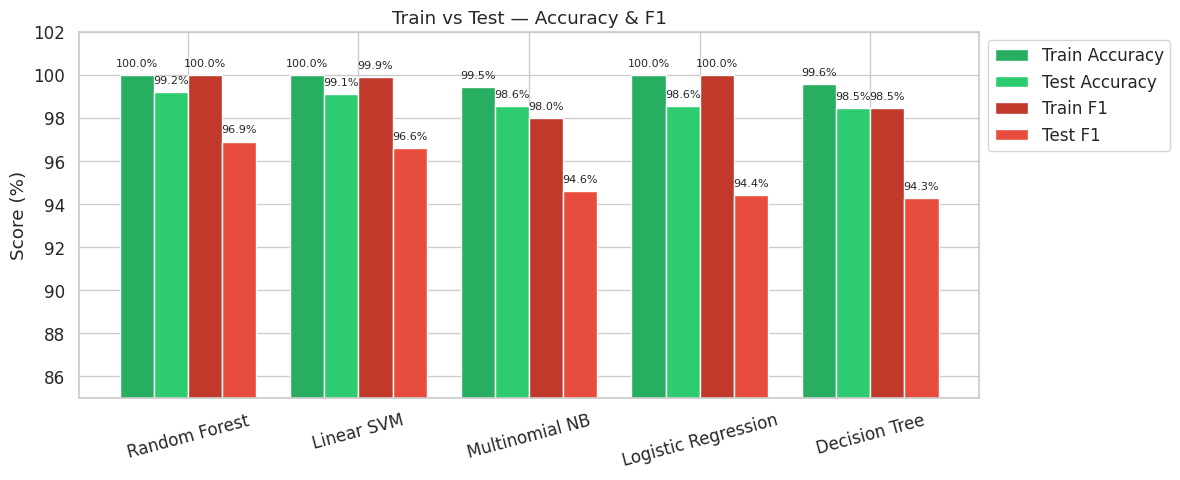

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
df_plot = df_results.copy()
for c in ["Train Accuracy","Test Accuracy","Train F1","Test F1"]:
    df_plot[c] *= 100
df_plot = df_plot.sort_values(by="Test F1", ascending=False).reset_index(drop=True)
x = np.arange(len(df_plot)); w = 0.2

fig, ax = plt.subplots(figsize=(12,5))  # increased width from 9 → 12
b1 = ax.bar(x-1.5*w,df_plot["Train Accuracy"],w,color="#27AE60",label="Train Accuracy")
b2 = ax.bar(x-0.5*w,df_plot["Test Accuracy"],w,color="#2ECC71",label="Test Accuracy")
b3 = ax.bar(x+0.5*w,df_plot["Train F1"],w,color="#C0392B",label="Train F1")
b4 = ax.bar(x+1.5*w,df_plot["Test F1"],w,color="#E74C3C",label="Test F1")

for bars in [b1,b2,b3,b4]:
    for bar in bars:
        h=bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2,h+0.3,f"{h:.1f}%",ha="center",va="bottom",fontsize=8)

ax.set(title="Train vs Test — Accuracy & F1",ylabel="Score (%)",ylim=(85,102))
ax.set_xticks(x)
ax.set_xticklabels(df_plot["Model"],rotation=15)
ax.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



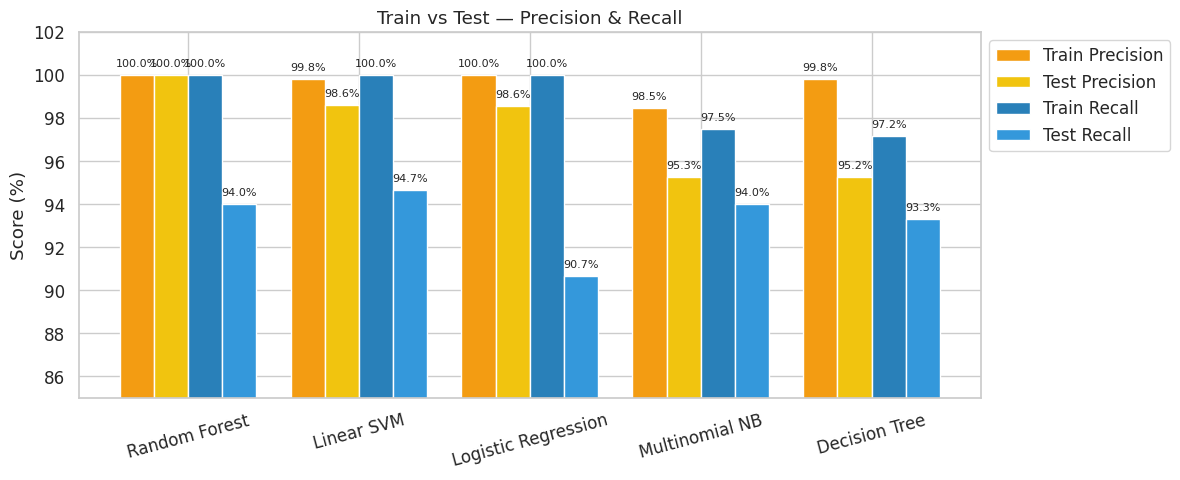

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
df_plot2 = df_results.copy()
for c in ["Train Precision","Test Precision","Train Recall","Test Recall"]:
    df_plot2[c] *= 100

# ✅ Sort by Test Precision
df_plot2 = df_plot2.sort_values(by="Test Precision", ascending=False).reset_index(drop=True)

x = np.arange(len(df_plot2)); w = 0.2
fig, ax = plt.subplots(figsize=(12,5))
b1 = ax.bar(x-1.5*w,df_plot2["Train Precision"],w,color="#F39C12",label="Train Precision")
b2 = ax.bar(x-0.5*w,df_plot2["Test Precision"],w,color="#F1C40F",label="Test Precision")
b3 = ax.bar(x+0.5*w,df_plot2["Train Recall"],w,color="#2980B9",label="Train Recall")
b4 = ax.bar(x+1.5*w,df_plot2["Test Recall"],w,color="#3498DB",label="Test Recall")

for bars in [b1,b2,b3,b4]:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2,h+0.3,f"{h:.1f}%",ha="center",va="bottom",fontsize=8)

ax.set(title="Train vs Test — Precision & Recall",ylabel="Score (%)",ylim=(85,102))
ax.set_xticks(x)
ax.set_xticklabels(df_plot2["Model"],rotation=15)
ax.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



In [ ]:
tuned_models['Random Forest']


RandomForestClassifier(n_estimators=200, random_state=42)

Confusion Matrix:
[[965   0]
 [  9 141]]


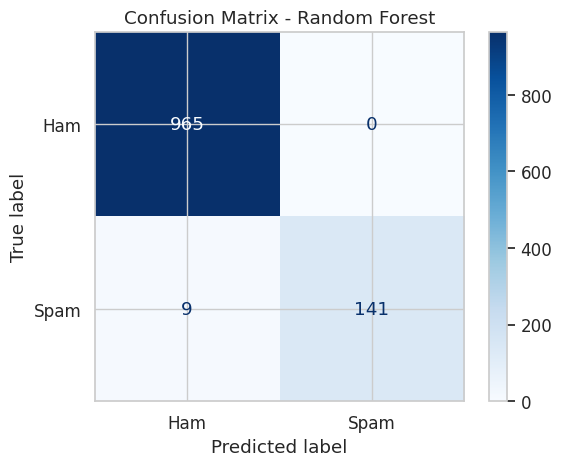

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = tuned_models['Random Forest'].predict(X_test_tfidf)

# Compute Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Display as numbers
print("Confusion Matrix:")
print(cm)

# Plot visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Saving best model and Vectorizer

In [ ]:
import joblib
import os

# ✅ Save vectorizer
os.makedirs("models", exist_ok=True)
joblib.dump(tfidf, "models/vectorizer.pkl")
print("✅ TF-IDF Vectorizer saved as 'models/vectorizer.pkl'")

# ✅ Save best model (top performer based on F1-score)
best_model_name = df_results.iloc[0]['Model']
best_model = tuned_models[best_model_name]
joblib.dump(best_model, f"models/{best_model_name.replace(' ', '_')}_model.pkl")
print(f"✅ Best Model ({best_model_name}) saved as 'models/{best_model_name.replace(' ', '_')}_model.pkl'")


✅ TF-IDF Vectorizer saved as 'models/vectorizer.pkl'
✅ Best Model (Random Forest) saved as 'models/Random_Forest_model.pkl'


In [ ]:
y_proba = tuned_models['Random Forest'].predict_proba(X_test_tfidf)[:, 1]

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.91, 0.05)
scores = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)
    prec = precision_score(Y_test, y_pred_custom)
    rec = recall_score(Y_test, y_pred_custom)
    f1 = f1_score(Y_test, y_pred_custom)
    scores.append((t, prec, rec, f1))

df_thresh = pd.DataFrame(scores, columns=["Threshold", "Precision", "Recall", "F1"])
print(df_thresh)


    Threshold  Precision    Recall        F1
0        0.10   0.795699  0.986667  0.880952
1        0.15   0.886228  0.986667  0.933754
2        0.20   0.924528  0.980000  0.951456
3        0.25   0.948052  0.973333  0.960526
4        0.30   0.966667  0.966667  0.966667
5        0.35   0.972603  0.946667  0.959459
6        0.40   0.979310  0.946667  0.962712
7        0.45   0.993007  0.946667  0.969283
8        0.50   1.000000  0.940000  0.969072
9        0.55   1.000000  0.926667  0.961938
10       0.60   1.000000  0.913333  0.954704
11       0.65   1.000000  0.880000  0.936170
12       0.70   1.000000  0.846667  0.916968
13       0.75   1.000000  0.786667  0.880597
14       0.80   1.000000  0.720000  0.837209
15       0.85   1.000000  0.686667  0.814229
16       0.90   1.000000  0.560000  0.717949


# Using Neural Networks

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
data.columns = ['label', 'text']

# Encode labels: ham → 0, spam → 1
data['label'] = LabelEncoder().fit_transform(data['label'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten

embedding_dim = 64  # lightweight dense representation

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Flatten(),  # converts embeddings to 1D
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # output layer for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,107,649 (8.04 MB)

 Trainable params: 2,107,649 (8.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8545 - loss: 0.3498 - val_accuracy: 0.9664 - val_loss: 0.1312
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9868 - loss: 0.0497 - val_accuracy: 0.9776 - val_loss: 0.0781
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9977 - loss: 0.0173 - val_accuracy: 0.9753 - val_loss: 0.1188
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9992 - loss: 0.0066 - val_accuracy: 0.9821 - val_loss: 0.1015
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9798 - val_loss: 0.1146
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9798 - val_loss: 0.1245
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9798 - val_loss: 0.1328
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 9.1726e-04 - val_

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"✅ Test Accuracy: {test_acc:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0870
✅ Test Accuracy: 0.9848


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         HAM       0.99      0.99      0.99       965
        SPAM       0.97      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[960   5]
 [ 12 138]]


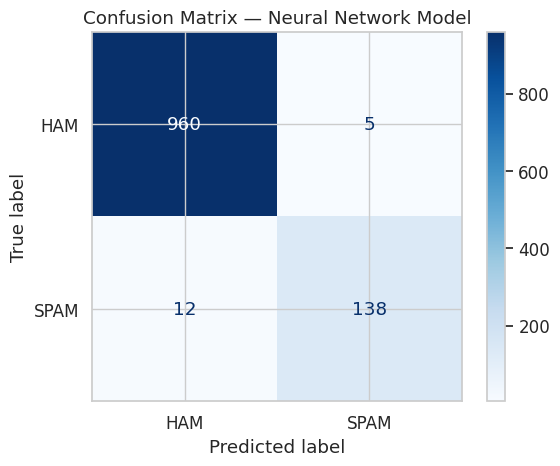

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

print(classification_report(y_test, y_pred, target_names=["HAM","SPAM"]))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HAM","SPAM"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix — Neural Network Model")
plt.show()



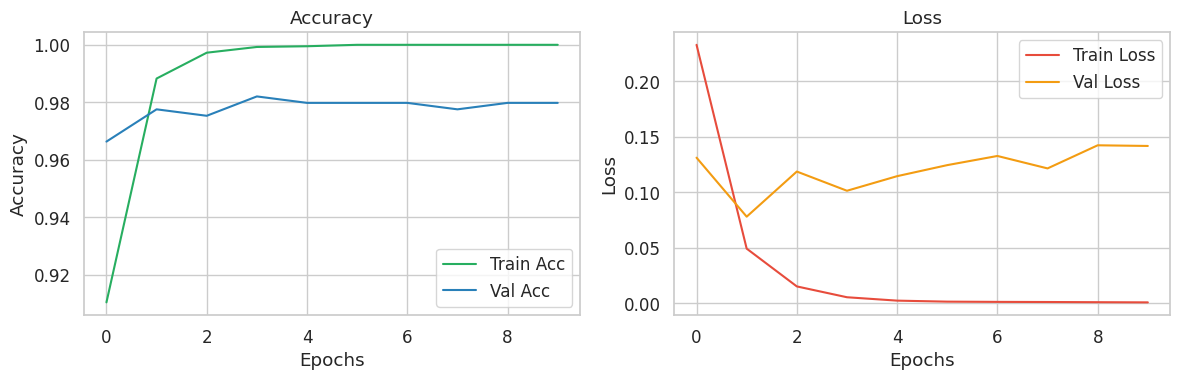

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(history.history['accuracy'], label='Train Acc', color='#27AE60')
axs[0].plot(history.history['val_accuracy'], label='Val Acc', color='#2980B9')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epochs'); axs[0].set_ylabel('Accuracy')
axs[0].legend(); axs[0].grid(True)

axs[1].plot(history.history['loss'], label='Train Loss', color='#E74C3C')
axs[1].plot(history.history['val_loss'], label='Val Loss', color='#F39C12')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epochs'); axs[1].set_ylabel('Loss')
axs[1].legend(); axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import os, re, joblib, numpy as np, pandas as pd, spacy

# ==============================================================
# 1️⃣ Load Trained Model and Vectorizer
# ==============================================================
MODEL_PATH = os.path.join("models", "Random_Forest_model.pkl")
VECTORIZER_PATH = os.path.join("models", "vectorizer.pkl")

print(" Loading TF-IDF Vectorizer and Random Forest Model...")
vectorizer = joblib.load(VECTORIZER_PATH)
model = joblib.load(MODEL_PATH)
print(" Model and Vectorizer Loaded Successfully!\n")

# ==============================================================
# 2️⃣ Load SpaCy Model for Lemmatization
# ==============================================================
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# ==============================================================
# 3️⃣ Text Preprocessing Function (Lemmatization + Cleaning)
# ==============================================================
def lemmatize_text(text):
    text = str(text)
    text = re.sub(r"[^a-zA-Z0-9@!$%\s]", " ", text)
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# ==============================================================
# 4️⃣ Spam Prediction Function (with Custom Threshold)
# ==============================================================
def predict_spam(messages, actual_labels=None, threshold=0.2):
    if isinstance(messages, str):
        messages = [messages]

    # Preprocess messages
    cleaned = [lemmatize_text(m) for m in messages]
    X = vectorizer.transform(cleaned)

    # Predict with probability threshold
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X)[:, 1]
        preds = (probs >= threshold).astype(int)
    else:
        preds = model.predict(X)
        probs = np.zeros(len(preds))

    # Create DataFrame of results
    df = pd.DataFrame({
        "Message": messages,
        "Actual": actual_labels if actual_labels else ["Unknown"] * len(messages),
        "Predicted": ["SPAM" if p == 1 else "HAM" for p in preds],
        "Spam Probability": np.round(probs, 3)
    })

    # Display results
    print("\n🔍 PREDICTIONS\n" + "-" * 120)
    print(df.to_string(index=False))
    print("-" * 120)

# ==============================================================
# 5️⃣ Interactive or Default Execution
# ==============================================================
if __name__ == "__main__":
    print("📨 SMS Spam Classifier (Random Forest + TF-IDF)\n")
    print("Enter a custom message or press Enter to use default examples.\n")

    user_input = input("Enter message: ").strip()

    if user_input == "":
        print("\n🧠 No custom input provided — running on default examples...\n")
        test_messages = [
            # ----- SPAM -----
            "Congratulations! You’ve won a $1000 Walmart gift card. Click the link to claim your prize now!",
            "URGENT! Your bank account has been locked. Verify your credentials immediately to avoid suspension.",
            "You have been selected for a FREE vacation to Maldives! Reply YES to confirm your booking.",
            "Claim your reward now — you are the lucky winner of an iPhone 15 Pro! Visit our site today.",
            "WIN BIG! Participate in our lucky draw and win up to ₹50,000 in cash prizes.",
            # ----- HAM -----
            "Hey, are we still meeting for dinner tonight?",
            "Don’t forget to bring your ID card for tomorrow’s exam.",
            "Your order has been shipped and will arrive by evening.",
            "Please review the attached presentation before the meeting.",
            "Good night! See you tomorrow at the lecture hall."
        ]
        actual_labels = ["SPAM","SPAM","SPAM","SPAM","SPAM","HAM","HAM","HAM","HAM","HAM"]
    else:
        print(f"\n📝 Using your input: {user_input}\n")
        test_messages = [user_input]
        actual_labels = None

    # Run Predictions
    predict_spam(test_messages, actual_labels, threshold=0.2)



📦 Loading TF-IDF Vectorizer and Random Forest Model...
✅ Model and Vectorizer Loaded Successfully!

📨 SMS Spam Classifier (Random Forest + TF-IDF)

Enter a custom message or press Enter to use default examples.

Enter message: 

🧠 No custom input provided — running on default examples...


🔍 PREDICTIONS
------------------------------------------------------------------------------------------------------------------------
                                                                                            Message Actual Predicted  Spam Probability
     Congratulations! You’ve won a $1000 Walmart gift card. Click the link to claim your prize now!   SPAM      SPAM             0.755
URGENT! Your bank account has been locked. Verify your credentials immediately to avoid suspension.   SPAM       HAM             0.155
         You have been selected for a FREE vacation to Maldives! Reply YES to confirm your booking.   SPAM      SPAM             0.350
        Claim your reward now — yo